In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:

dataset=pd.read_csv(r"C:\Users\aakan\Downloads\2_letter_recognition.data", sep=",", header=None)
dataset.head()
                    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
X=dataset.iloc[:,1:17]
Y=dataset.select_dtypes(include=[object])
print(X.head(5))
print(Y.head(5))

   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
   0
0  T
1  I
2  D
3  N
4  G


In [4]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)


In [5]:
scaler =StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train = scaler.transform(X_train)
X_validation =scaler.transform(X_validation)


In [7]:
mmlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='relu', random_state=1)


In [8]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='relu', random_state=1)
mlp.fit(X_train, Y_train)


C:\Users\aakan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, random_state=1)

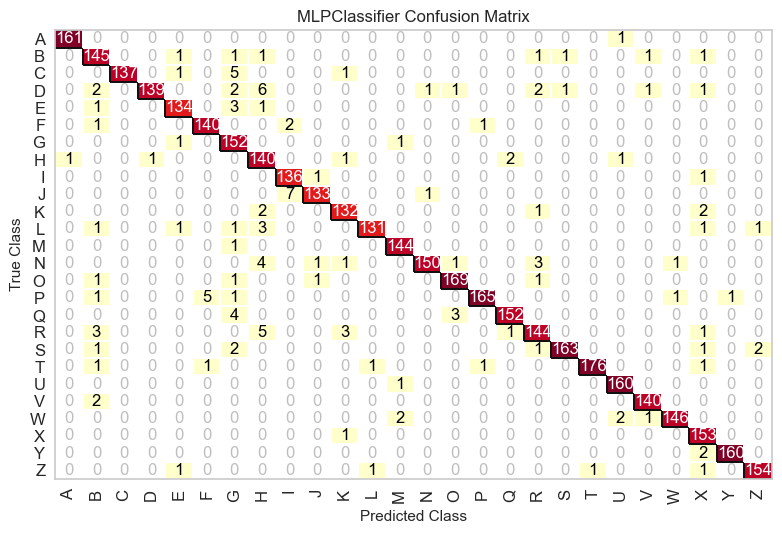

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [11]:
from yellowbrick.classifier import ConfusionMatrix

Y_train = Y_train.values.ravel()
Y_validation = Y_validation.values.ravel()

# Create confusion matrix visualizer
cm = ConfusionMatrix(mlp, classes=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

# Fit and score using Yellowbrick
cm.fit(X_train, Y_train)
cm.score(X_validation, Y_validation)
cm.show()



In [12]:
cm.fit(X_train,Y_train.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000012A0A4585C0>,
                estimator=MLPClassifier(hidden_layer_sizes=(250, 300),
                                        max_iter=1000000, random_state=1))

In [13]:
cm.score(X_validation,Y_validation)

0.964

In [14]:
predictions=cm.predict(X_validation)
predictions

array(['D', 'D', 'V', ..., 'U', 'A', 'A'], dtype='<U1')

In [15]:
print("Accuracy: ",accuracy_score(Y_validation,predictions))

Accuracy:  0.964
